# Dog Breed Identification
## Farhad Navid 

### File name = DB_EDA.jpynb

This file includes the Exploratory Data Analysis (EDA) on the Dog Breed Identification images. 

** Examine the label.csv file in the directory.**  

* Display top 10 row
* Display tail 10 row

** Bar Plots and Histogram Plots **

* Display top 10 Breed count
* Display tail 10 Breed count
* Display Sorted Count vs Breed
* Histogram of the all image Width
* histogram of the all image Height
* print the average Height and Width

** Display images **

* Display an image from the directory 
* Display resized image (224 X 224)  


In [1]:
# initialization
import matplotlib.pyplot as plt
import numpy 
import PIL
import pandas as pd
import os
import glob
import time
import numpy as np
import h5py
import cv2

import shutil

import seaborn as sns
import missingno as msno

from tqdm import tqdm

from keras.preprocessing import image

from subprocess import check_output

from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K
from keras.optimizers import Adam

%matplotlib inline
K.set_image_dim_ordering( 'tf' )

Using TensorFlow backend.


This next block of code does represent the Directory structure of the data once the repository was selected.  In this instance the [**AWS**](https://www.AWS.amazon.com/) (paid service) were utilized.  

In [2]:
# directory structure of the data

dpath_train = '/home/ubuntu/train'      # Data path to training data set
dpath_test  = '/home/ubuntu/test'       # Data path to test data set
dpath       = '/home/ubuntu'
label_f     = '/home/ubuntu/labels.csv' # Path to the label file 

## Visualizing the image.

* ** Examining the labels for the data set.**
* ** Looking at one of the files to get an idea about the pictures.**

In [3]:
# Load the CSV file and display the top 10 row. the coulums are image id and the Breed
labels = pd.read_csv(label_f)
labels.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [4]:
# display the tail 10 row of the CSV file
labels.tail(10)

,id,breed
10212,ffc532991d3cd7880d27a449ed1c4770,tibetan_terrier
10213,ffca1c97cea5fada05b8646998a5b788,english_foxhound
10214,ffcb610e811817766085054616551f9c,briard
10215,ffcde16e7da0872c357fbc7e2168c05f,airedale
10216,ffcffab7e4beef9a9b8076ef2ca51909,samoyed
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher
10221,fff43b07992508bc822f33d8ffd902ae,chesapeake_bay_retriever


## Histogram of the Data set

** We will examin the Counts for top 10 catagories and 10 Lowest counts in the data set** 

** Display the top 10 catagories and 10 Lowest counts in the data set** 

In [5]:
Breed_Count = pd.value_counts(labels['breed'])
Breed_Count.head(10)

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
pomeranian              111
great_pyrenees          111
basenji                 110
samoyed                 109
Name: breed, dtype: int64

In [6]:
Breed_Count.tail(10)

otterhound           69
german_shepherd      69
walker_hound         69
tibetan_mastiff      69
giant_schnauzer      69
golden_retriever     67
brabancon_griffon    67
komondor             67
eskimo_dog           66
briard               66
Name: breed, dtype: int64

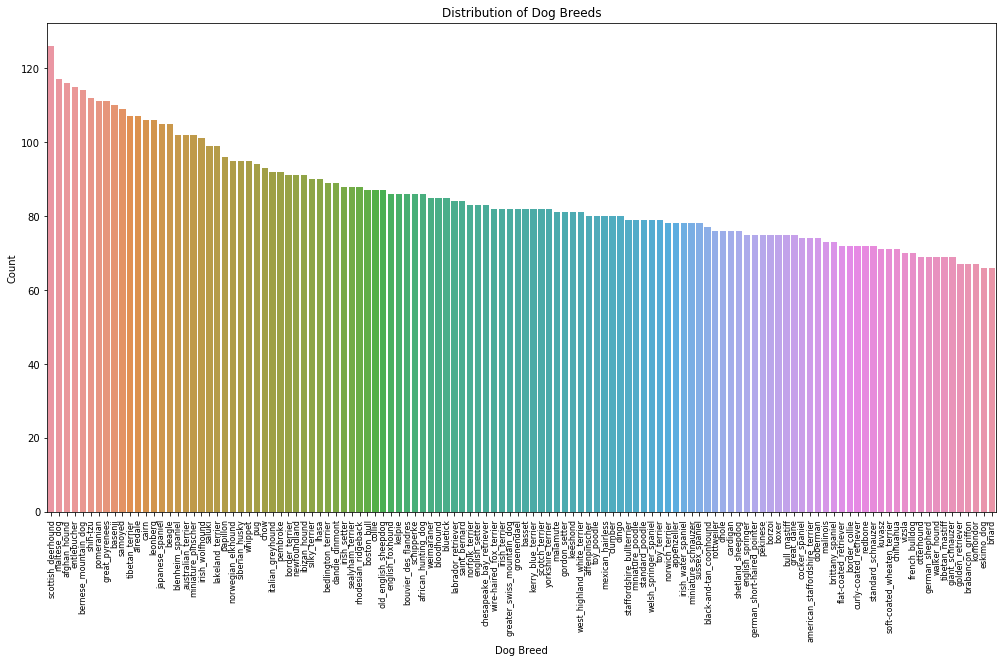

In [7]:
Breed_Count = pd.value_counts(labels['breed'])

fig, ax = plt.subplots()
fig.set_size_inches(17, 9)

axis = sns.barplot(x = Breed_Count.index, y = Breed_Count, data = labels)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)
ax.set(xlabel='Dog Breed', ylabel='Count')
ax.set_title('Distribution of Dog Breeds')

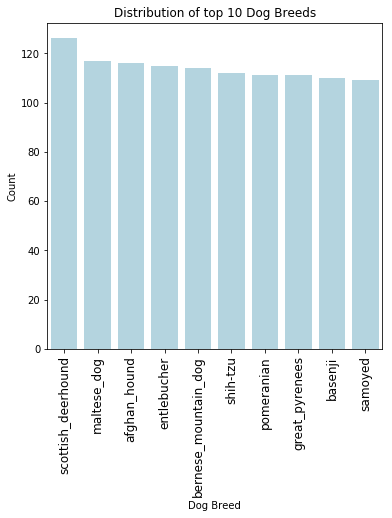

In [8]:
# 
Breed_Count = pd.value_counts(labels['breed'])
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
axis = sns.barplot(x = Breed_Count.head(10).index, y = Breed_Count.head(10), data = labels,color="lightblue")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 12)
ax.set(xlabel='Dog Breed', ylabel='Count')
ax.set_title('Distribution of top 10 Dog Breeds')

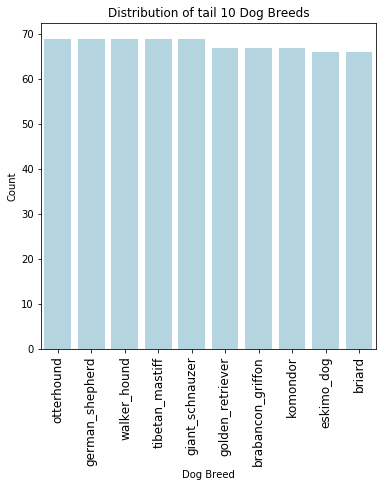

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)

axis = sns.barplot(x = Breed_Count.tail(10).index, y = Breed_Count.tail(10), data = labels,color="lightblue")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 12)
ax.set(xlabel='Dog Breed', ylabel='Count')
ax.set_title('Distribution of tail 10 Dog Breeds')

In [11]:
# Cycle through the pictures in the directory and record Hiegth and Width of each pictures.
temp = 0
img_height = []
img_width = []
for x, breed in tqdm(labels.values):
    img = cv2.imread('/home/ubuntu/train/{}.jpg'.format(x))
    img_height.append(img.shape[0])
    img_width.append(img.shape[1])
    temp = x

100%|██████████| 10222/10222 [00:19<00:00, 524.89it/s]


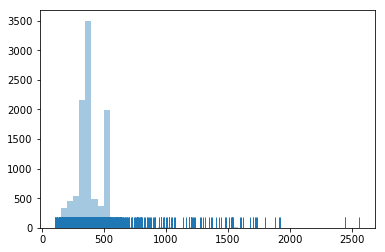

In [12]:
# Plot histogram enabled the option of rugplot() to show the tic marks 
sns.distplot(img_height, kde=False, rug=True)

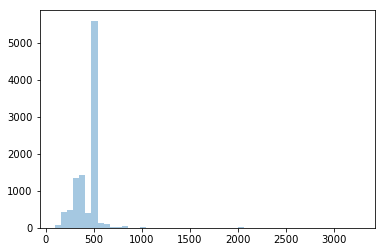

In [13]:
# Plot histogram disabled the option of rugplot() just to see the diffrence.  
sns.distplot(img_width, kde=False, rug=False)

In [14]:
print('Mean_Height = ',np.mean(img_height))
print('Mean_Width = ',np.mean(img_width))

Mean_Height =  386.747211896
Mean_Width =  443.331539816


## Checking the images
* ** Train data set images**
 * Original image and resized image
* ** Test Data set images**
 * Original image and resized image

(375, 500, 3)


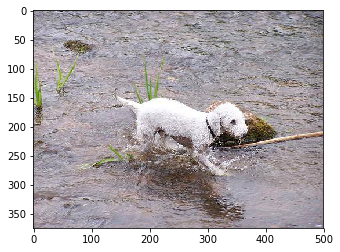

In [15]:
# sample image for debug purpose I will eliminate once sure the data set is correct. 
# Playing with the image and ploting will be use to compare with reduced size image.
os.chdir(dpath_train)
dogs = sorted(glob.glob('*.jpg'))
c5 = PIL.Image.open(dogs[5]) #read file path to an image, now c0 is a numpy image
cc5=np.array(c5)
print(cc5.shape)  # cc0 is the numpy array
plt.imshow(c5)    # vplotting the origenal sample image 

* **Now let’s look at the image when we resize it.  need to make sure the image looks ok.**

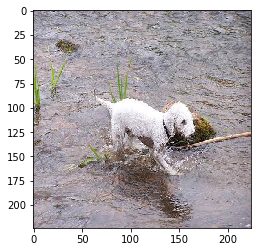

In [16]:
#cr0 is the reduced version of same image as above AKA resizeing the picture
cr5=c5.resize((224,224))
plt.imshow(cr5)    #the dog looks squashed, but seems ok and features are still there.  

## Checking the test images 
### Just print a sample make sure it looks ok for comparison.

10357


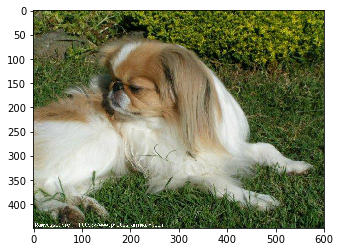

In [17]:
# now let's gt the test data prepared.
os.chdir(dpath_test)    # need to be in test data dir
# these are the files in the train directory
test_dogs = sorted(glob.glob('*.jpg'))
# chk to see the num of files in directory  can be eliminated once it is working
print(len(test_dogs))
c0_test = PIL.Image.open(test_dogs[0])
#test_dogs[:10]
plt.imshow(c0_test) # visualize a smaple image

* **Resized test image**

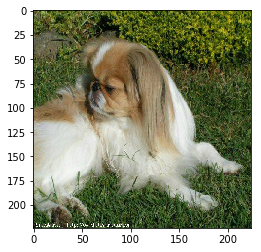

In [18]:
# Plot the resized just to make sure still looks OK.
cr0_test=c0_test.resize((224,224))
plt.imshow(cr0_test) #now the dogt looks squashed, but seems ok for this one. 

Making sure the pictures have all the necessary features when resized to 224 X 224 image size.

# Legacy code just for history

### Directory structure
* This is a very usefull code and can be used to create directory structure for each Breed in the data set. incase if one needs to augment images per breed rather than all data set. 

I did not used this code because decided to Augment all the images instead of augmenting by breed.  [Source](https://www.kaggle.com/jeru666/dog-eat-dog-world-eda-useful-scripts)
 

In [ ]:

# path = "/home/ubuntu/"

# label = pd.read_csv(path + "labels.csv")
# train_path = '/home/ubuntu/train/'
# new_train_path = '/home/ubuntu/new_train/'
# #--- snippet to split train images into 120 folders ---

# c = 0
# for i in range(len(label)):
#     l = label.id[i]
#     for filename in os.listdir(train_path):	    
#         f = filename[:-4]
#         if (l == f):
#             print (c)
#             c+=1
#             if not os.path.exists(new_train_path + label.breed[i]):
#                 os.makedirs(new_train_path + label.breed[i])
#                 shutil.copy2(train_path + filename, new_train_path + label.breed[i])				
#             else:
#                 shutil.copy2(train_path + filename, new_train_path + label.breed[i])